In [1]:
import torch
import torch.nn as nn
import numpy as np
from gensim.models import KeyedVectors
from main import run

In [2]:
def load_glove_embeddings(file_path, word_to_index, embedding_dim):
    embeddings = {}
    with open(file_path, "r", encoding="utf-8") as file:
        for line in file:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype="float32")
            embeddings[word] = coefs

    num_words = len(word_to_index)+1  # add 1 for the padding token
    embedding_matrix = np.zeros((num_words, embedding_dim))

    for word, index in word_to_index.items():
        if (embedding := embeddings.get(word)) is not None:
            embedding_matrix[index] = embedding
        else:
            embedding_matrix[index] = embeddings.get("<unk>", np.zeros(embedding_dim))

    return embedding_matrix

In [3]:
def load_word2vec_embeddings(file_path, word_to_index, embedding_dim):
    model = KeyedVectors.load_word2vec_format(file_path, binary=True)
    embedding_matrix = np.zeros((len(word_to_index) + 1, embedding_dim))

    for word, index in word_to_index.items():
        embedding_matrix[index] = model[word] if word in model else np.zeros(embedding_dim)

    return embedding_matrix

In [4]:
def load_fasttext_embeddings(embedding_file, word_index, embedding_dim):
    embeddings_index = {}
    with open(embedding_file, encoding="utf-8") as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype="float32")
            embeddings_index[word] = coefs

    embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
    for word, i in word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

    return embedding_matrix

In [5]:
class Rnn(nn.Module):
    def __init__(self, embedding_matrix, hidden_size, output_size, embedding_dim):
        super(Rnn, self).__init__()
        self.embedding = nn.Embedding.from_pretrained(torch.FloatTensor(embedding_matrix), padding_idx=0)
        self.rnn = nn.RNN(input_size=embedding_dim, hidden_size=hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.embedding(x)
        output, _ = self.rnn(x)
        output = self.fc(output)
        return output

In [6]:
class Lstm(nn.Module):
    def __init__(self, embedding_matrix, hidden_size, output_size, embedding_dim):
        super(Lstm, self).__init__()
        self.embedding = nn.Embedding.from_pretrained(torch.FloatTensor(embedding_matrix), padding_idx=0)
        self.lstm = nn.LSTM(input_size=embedding_dim, hidden_size=hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.embedding(x)
        lstm_out, _ = self.lstm(x)
        output = self.fc(lstm_out)
        return output

In [7]:
class Gru(nn.Module):
    def __init__(self, embedding_matrix, hidden_size, output_size, embedding_dim):
        super(Gru, self).__init__()
        self.embedding = nn.Embedding.from_pretrained(torch.FloatTensor(embedding_matrix), padding_idx=0)
        self.gru = nn.GRU(input_size=embedding_dim, hidden_size=hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.embedding(x)
        output, _ = self.gru(x)
        output = self.fc(output)
        return output

Epoch: 40/40
Validation Loss: 0.0855
Validation Macro F1: 0.7288
Training Macro F1: 0.9160


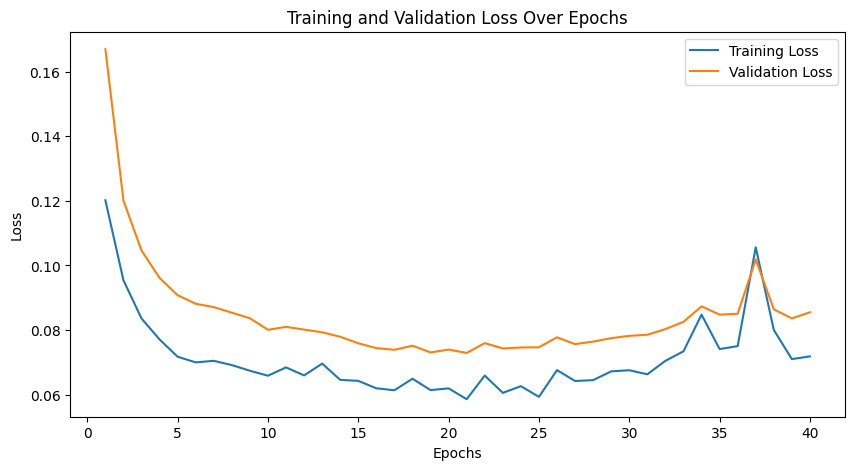

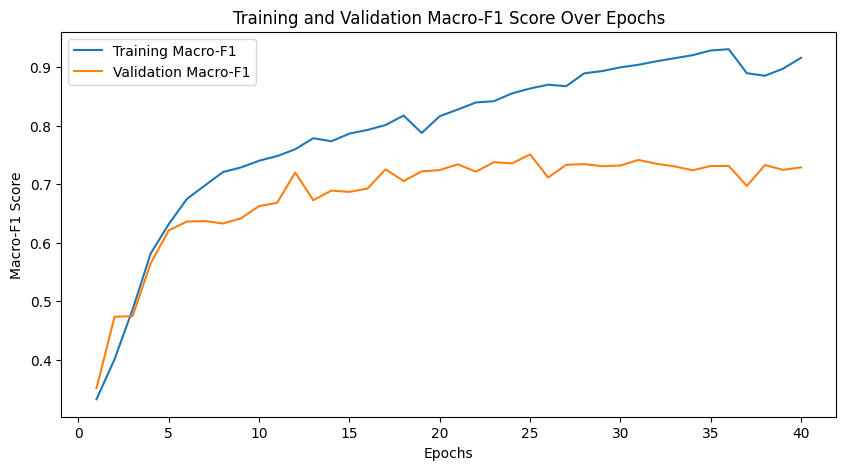

Final Test Accuracy: 0.9669
Final Test Macro F1: 0.6728
Classification Report for Test Data:
               precision    recall  f1-score   support

           O       0.97      0.99      0.98     14774
           B       0.69      0.45      0.55       463
           I       0.70      0.37      0.49       243

    accuracy                           0.97     15480
   macro avg       0.79      0.61      0.67     15480
weighted avg       0.96      0.97      0.96     15480



In [9]:
run(load_glove_embeddings, 300, "../word_embeddings/glove.6B.300d.txt", Rnn, "rnn_glove",40)

Epoch: 40/40
Validation Loss: 0.0857
Validation Macro F1: 0.7396
Training Macro F1: 0.9612


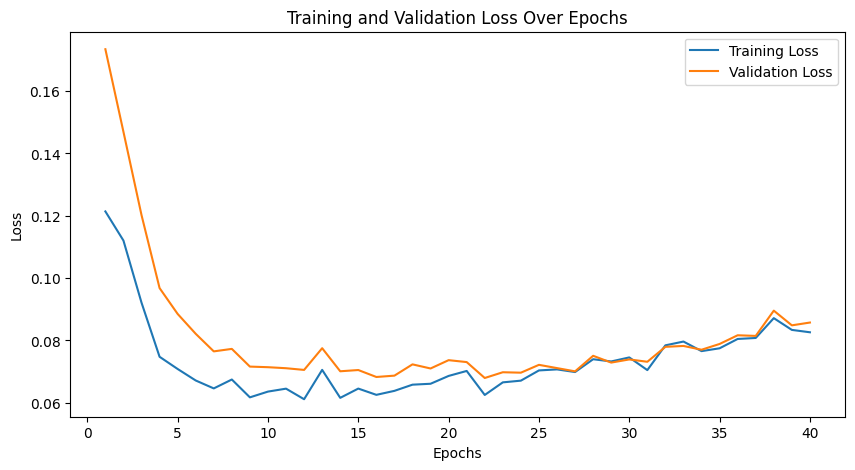

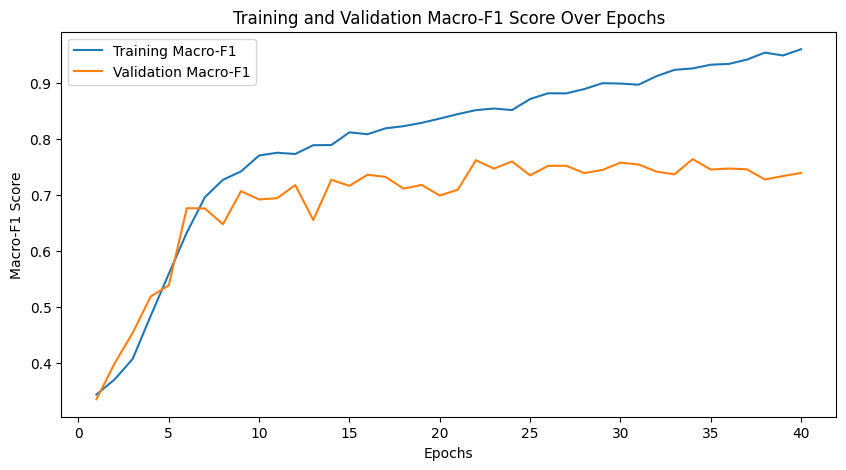

Final Test Accuracy: 0.9679
Final Test Macro F1: 0.6886
Classification Report for Test Data:
               precision    recall  f1-score   support

           O       0.98      0.99      0.98     14774
           B       0.65      0.57      0.61       463
           I       0.67      0.37      0.47       243

    accuracy                           0.97     15480
   macro avg       0.77      0.64      0.69     15480
weighted avg       0.96      0.97      0.97     15480



In [10]:
run(load_word2vec_embeddings, 300, "../word_embeddings/GoogleNews-vectors-negative300.bin", Rnn, "rnn_word2vec",40)

Epoch: 40/40
Validation Loss: 0.0823
Validation Macro F1: 0.7493
Training Macro F1: 0.9577


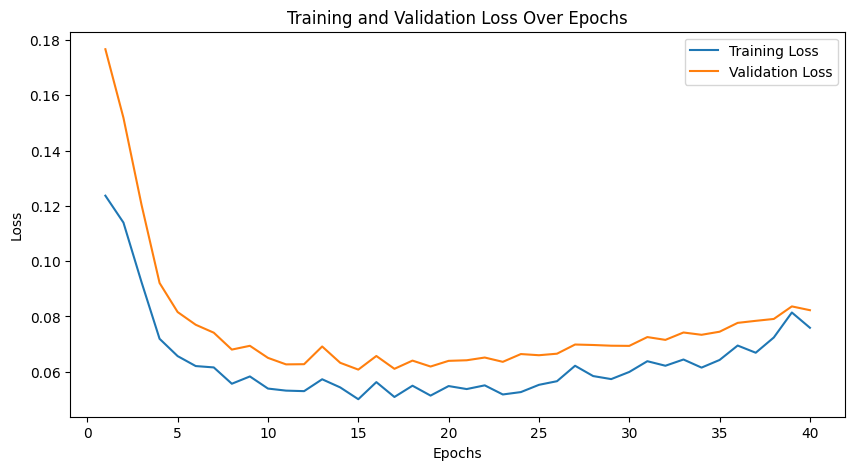

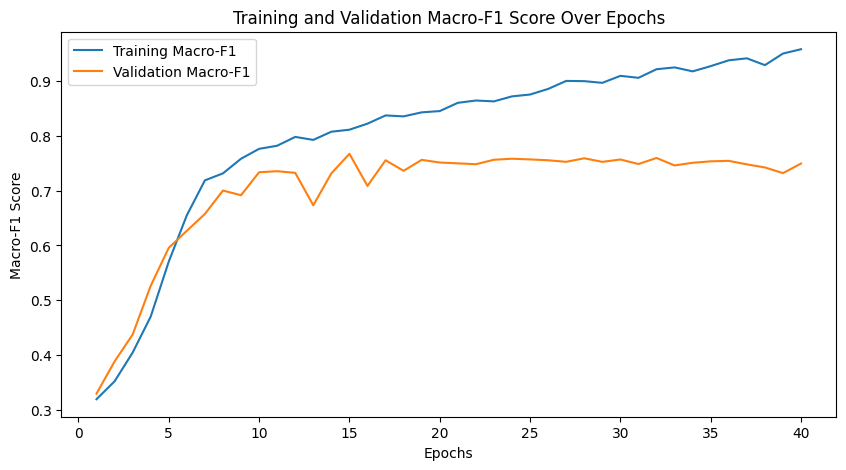

Final Test Accuracy: 0.9716
Final Test Macro F1: 0.7091
Classification Report for Test Data:
               precision    recall  f1-score   support

           O       0.98      0.99      0.99     14774
           B       0.75      0.56      0.64       463
           I       0.77      0.37      0.50       243

    accuracy                           0.97     15480
   macro avg       0.83      0.64      0.71     15480
weighted avg       0.97      0.97      0.97     15480



In [11]:
run(load_fasttext_embeddings, 300, "../word_embeddings/wiki-news-300d-1M.vec", Rnn, "rnn_fasttext",40)

Epoch: 40/40
Validation Loss: 0.0884
Validation Macro F1: 0.7440
Training Macro F1: 0.9699


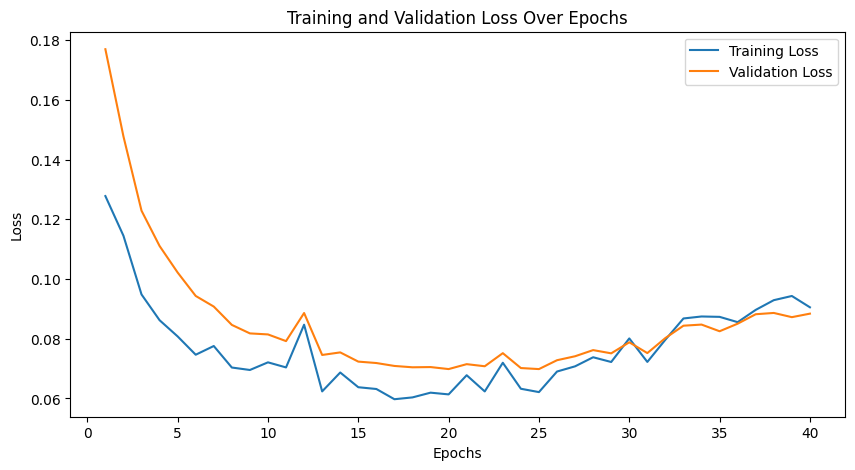

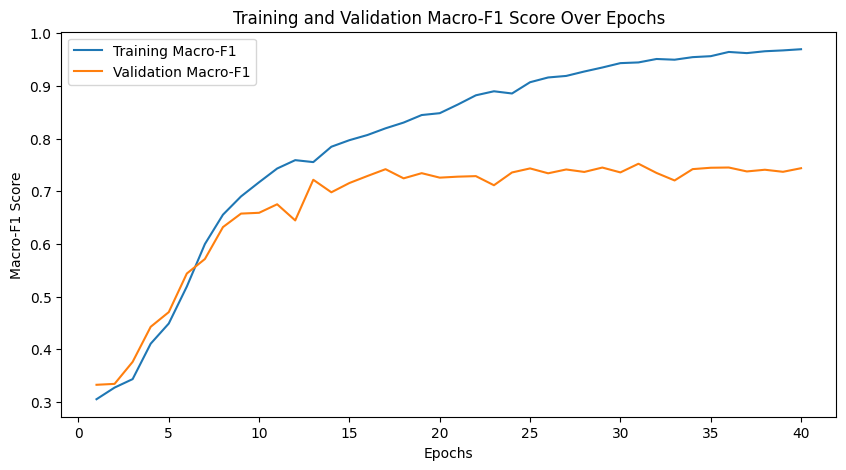

Final Test Accuracy: 0.9676
Final Test Macro F1: 0.6712
Classification Report for Test Data:
               precision    recall  f1-score   support

           O       0.98      0.99      0.98     14774
           B       0.67      0.52      0.58       463
           I       0.65      0.34      0.45       243

    accuracy                           0.97     15480
   macro avg       0.76      0.62      0.67     15480
weighted avg       0.96      0.97      0.96     15480



In [12]:
run(load_glove_embeddings, 300, "../word_embeddings/glove.6B.300d.txt", Lstm, "lstm_glove",40)

Epoch: 40/40
Validation Loss: 0.0914
Validation Macro F1: 0.7551
Training Macro F1: 0.9703


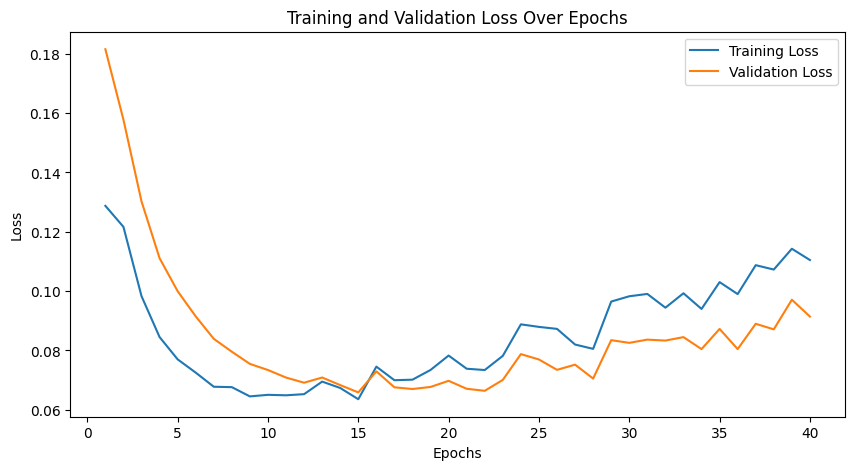

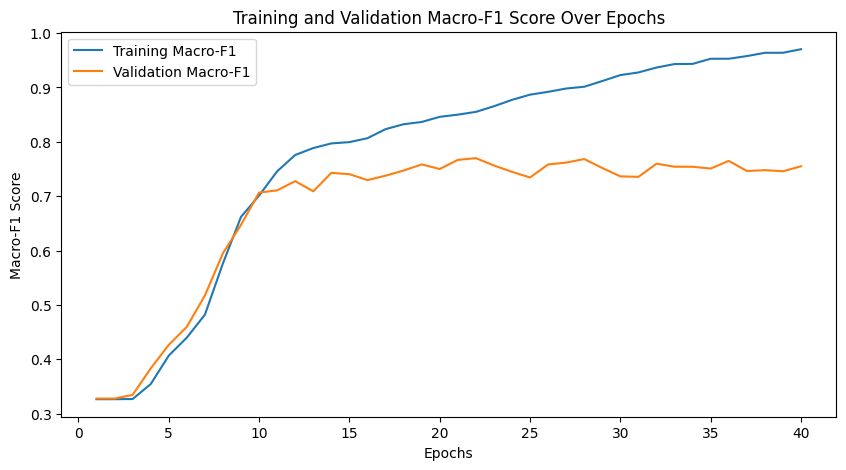

Final Test Accuracy: 0.9720
Final Test Macro F1: 0.6995
Classification Report for Test Data:
               precision    recall  f1-score   support

           O       0.98      1.00      0.99     14774
           B       0.74      0.56      0.64       463
           I       0.86      0.33      0.48       243

    accuracy                           0.97     15480
   macro avg       0.86      0.63      0.70     15480
weighted avg       0.97      0.97      0.97     15480



In [13]:
run(load_word2vec_embeddings, 300, "../word_embeddings/GoogleNews-vectors-negative300.bin", Lstm, "lstm_word2vec",40)

Epoch: 40/40
Validation Loss: 0.0769
Validation Macro F1: 0.7508
Training Macro F1: 0.9567


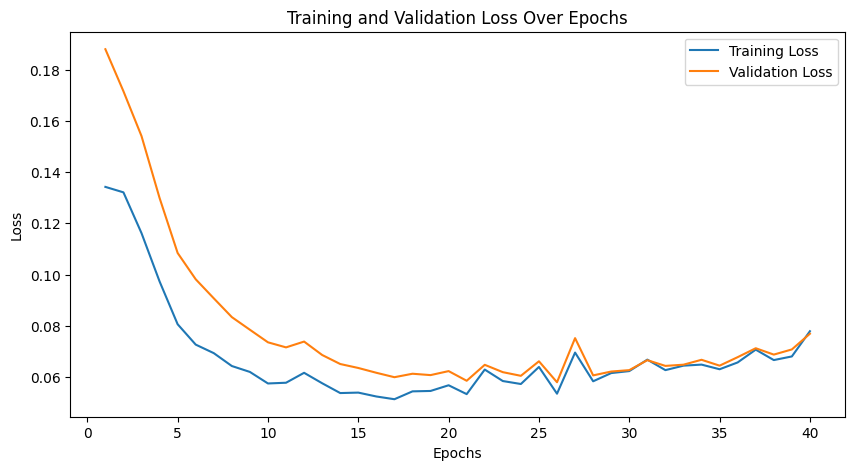

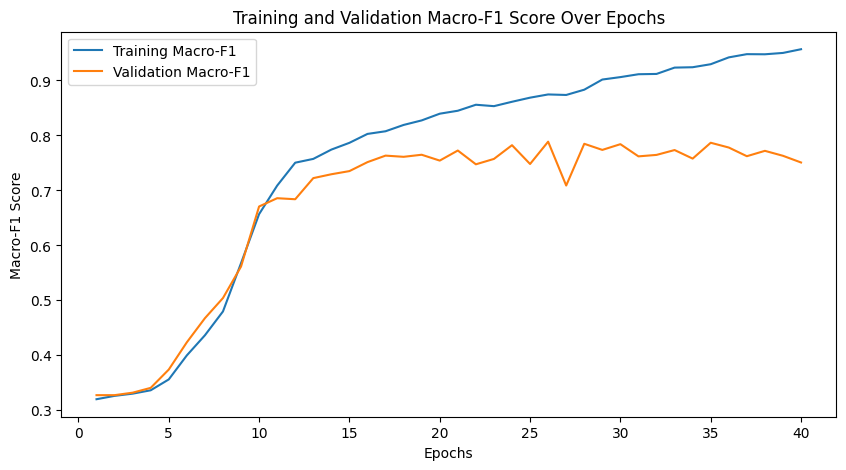

Final Test Accuracy: 0.9724
Final Test Macro F1: 0.7189
Classification Report for Test Data:
               precision    recall  f1-score   support

           O       0.98      0.99      0.99     14774
           B       0.76      0.59      0.66       463
           I       0.79      0.37      0.51       243

    accuracy                           0.97     15480
   macro avg       0.84      0.65      0.72     15480
weighted avg       0.97      0.97      0.97     15480



In [14]:
run(load_fasttext_embeddings, 300, "../word_embeddings/wiki-news-300d-1M.vec", Lstm, "lstm_fasttext",40)

Epoch: 40/40
Validation Loss: 0.0895
Validation Macro F1: 0.7353
Training Macro F1: 0.9731


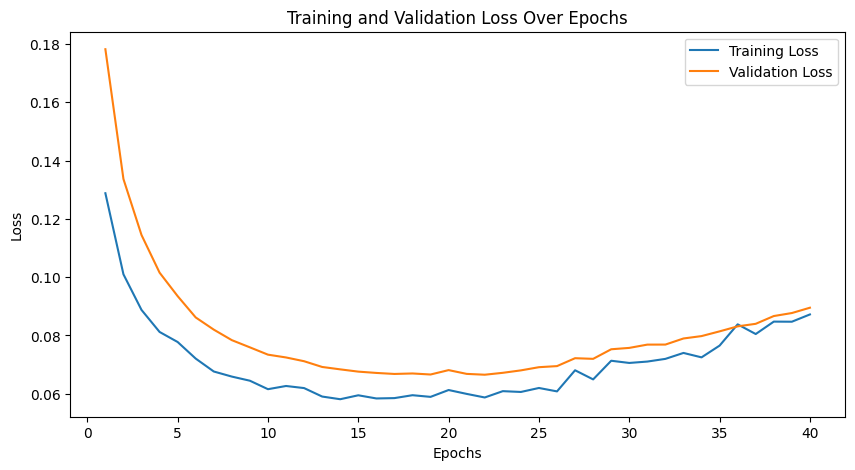

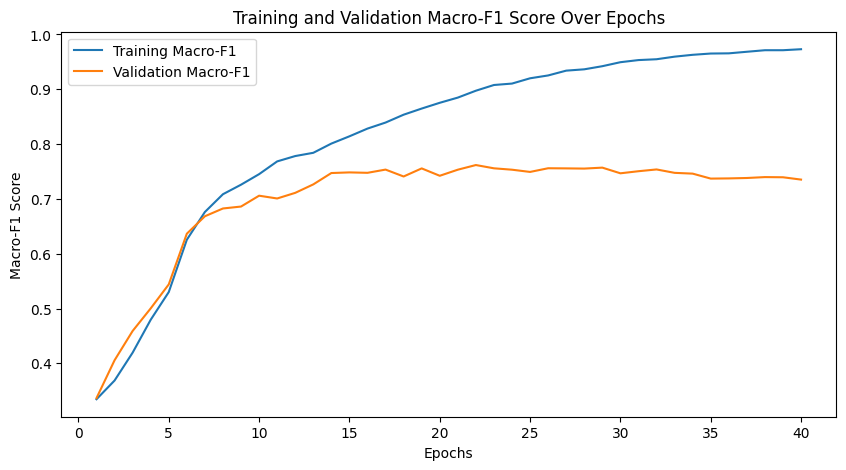

Final Test Accuracy: 0.9685
Final Test Macro F1: 0.6847
Classification Report for Test Data:
               precision    recall  f1-score   support

           O       0.98      0.99      0.98     14774
           B       0.68      0.52      0.59       463
           I       0.70      0.37      0.48       243

    accuracy                           0.97     15480
   macro avg       0.79      0.63      0.68     15480
weighted avg       0.96      0.97      0.97     15480



In [16]:
run(load_glove_embeddings, 300, "../word_embeddings/glove.6B.300d.txt", Gru, "gru_glove",40)

Epoch: 40/40
Validation Loss: 0.0900
Validation Macro F1: 0.7473
Training Macro F1: 0.9755


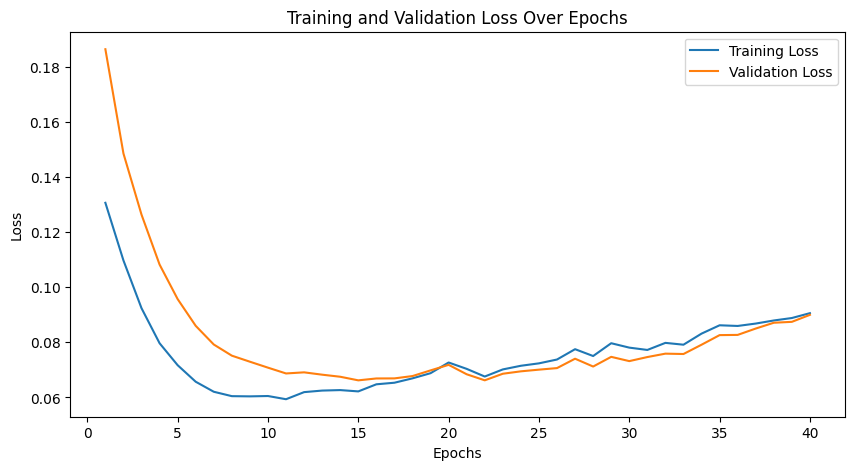

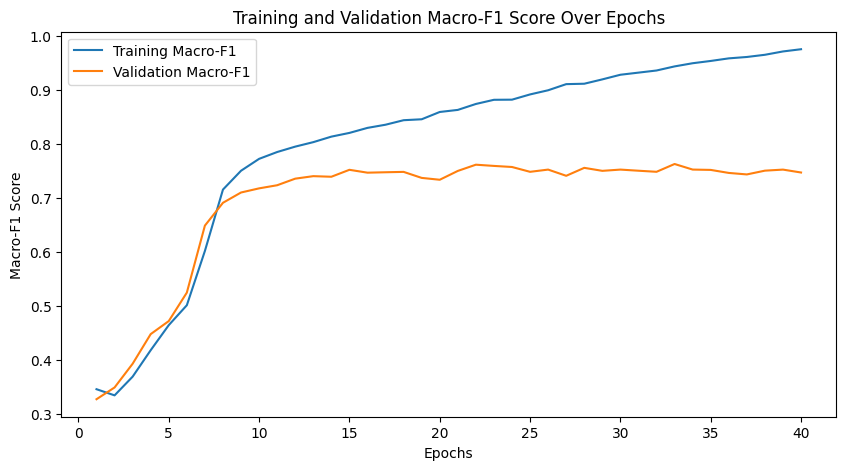

Final Test Accuracy: 0.9724
Final Test Macro F1: 0.7102
Classification Report for Test Data:
               precision    recall  f1-score   support

           O       0.98      1.00      0.99     14774
           B       0.74      0.57      0.64       463
           I       0.81      0.36      0.50       243

    accuracy                           0.97     15480
   macro avg       0.85      0.64      0.71     15480
weighted avg       0.97      0.97      0.97     15480



In [17]:
run(load_word2vec_embeddings, 300, "../word_embeddings/GoogleNews-vectors-negative300.bin", Gru, "gru_word2vec", 40)

Epoch: 40/40
Validation Loss: 0.0716
Validation Macro F1: 0.7838
Training Macro F1: 0.9415


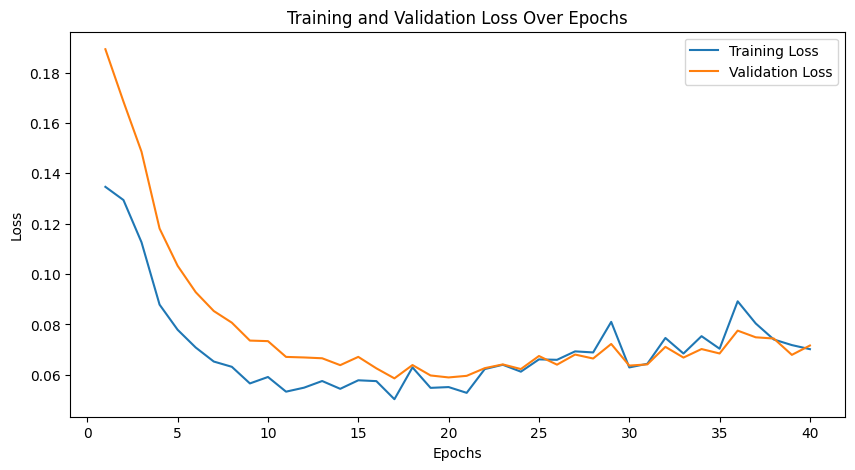

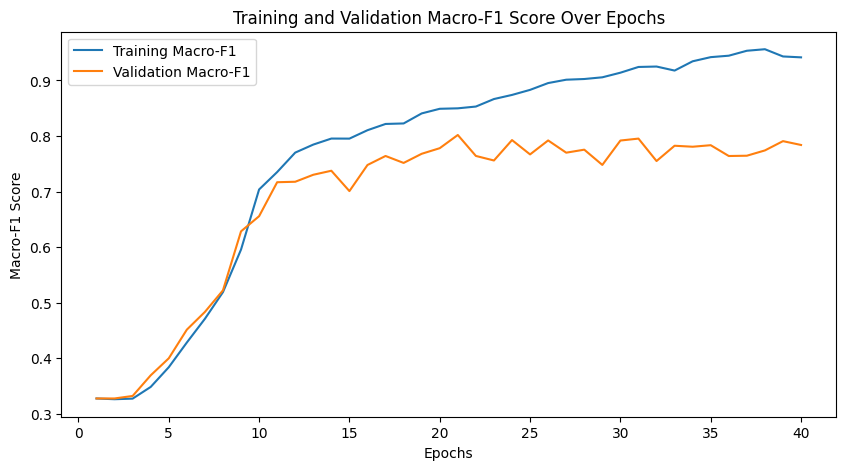

Final Test Accuracy: 0.9730
Final Test Macro F1: 0.7349
Classification Report for Test Data:
               precision    recall  f1-score   support

           O       0.98      0.99      0.99     14774
           B       0.74      0.62      0.68       463
           I       0.77      0.42      0.54       243

    accuracy                           0.97     15480
   macro avg       0.83      0.68      0.73     15480
weighted avg       0.97      0.97      0.97     15480



In [18]:
run(load_fasttext_embeddings, 300, "../word_embeddings/wiki-news-300d-1M.vec", Lstm, "lstm_fasttext",40)